In [51]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "C:\\Users\\user\\AppData\\Local\\Temp\\3e358ba2-f66e-435a-a7a8-64be408a4b01_Random Forest.zip.b01\\Random Forest\\glass.xlsx"
df = pd.read_excel(file_path)
print(df.head())


  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum          


In [47]:
# Define and set column names
column_names = ['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df.columns = column_names

# Check the DataFrame again
print("Updated DataFrame:")
print(df.head())


Updated DataFrame:
        RI     Na    Mg    AI     Si     K    Ca   Ba    Fe  Type
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1


In [52]:


# List sheet names
print("Sheet names:", xls.sheet_names)


Sheet names: ['Description', 'glass']


In [53]:

# Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(df.head())

# Display column names to verify
print("Column names:")
print(df.columns)


First few rows of the dataset:
  Prepare a model for glass classification using Random Forest
0                                  Data Description:          
1                              RI : refractive index          
2  Na: Sodium (unit measurement: weight percent i...          
3                                      Mg: Magnesium          
4                                       AI: Aluminum          
Column names:
Index(['Prepare a model for glass classification using Random Forest'], dtype='object')


In [27]:
# Load the dataset while skipping the first few rows if necessary
# Adjust the number of rows to skip based on your inspection
df = pd.read_excel(file_path, sheet_name='glass', skiprows=1)

# Display the first few rows to verify correct data loading
print("Cleaned dataset:")
print(df.head())

# Check the column names
print("Column names after cleaning:")
print(df.columns)


Cleaned dataset:
   1.52101  13.64  4.49   1.1  71.78  0.06  8.75    0   0.1  1
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00  1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00  1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00  1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00  1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26  1
Column names after cleaning:
Index([1.52101, 13.64, 4.49, 1.1, 71.78, 0.06, 8.75, 0, '0.1', 1], dtype='object')


In [28]:
# Define column names
column_names = ['RI', 'Na', 'Mg', 'AI', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Check the number of columns to ensure it matches the number of names
if len(df.columns) == len(column_names):
    df.columns = column_names
else:
    print(f"Mismatch in number of columns. DataFrame has {len(df.columns)} columns but {len(column_names)} names provided.")

# Display the updated DataFrame
print("Updated DataFrame with column names:")
print(df.head())


Updated DataFrame with column names:
        RI     Na    Mg    AI     Si     K    Ca   Ba    Fe  Type
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1


In [29]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
RI      0
Na      0
Mg      0
AI      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [31]:
#1. Exploratory Data Analysis (EDA)
1.1 Descriptive Statistics
# Display basic statistics for the dataset
print("Descriptive statistics:")
print(df.describe())


Descriptive statistics:
               RI          Na          Mg          AI          Si           K  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean     1.518353   13.406761    2.676056    1.446526   72.655023    0.499108   
std      0.003039    0.818371    1.440453    0.499882    0.774052    0.653035   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516520   12.900000    2.090000    1.190000   72.280000    0.130000   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.560000   
75%      1.519150   13.830000    3.600000    1.630000   73.090000    0.610000   
max      1.533930   17.380000    3.980000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  213.000000  213.000000  213.000000  213.000000  
mean     8.957934    0.175869    0.057277    2.788732  
std      1.426435    0.498245    0.097589    2.105130  
min      5.430000    0

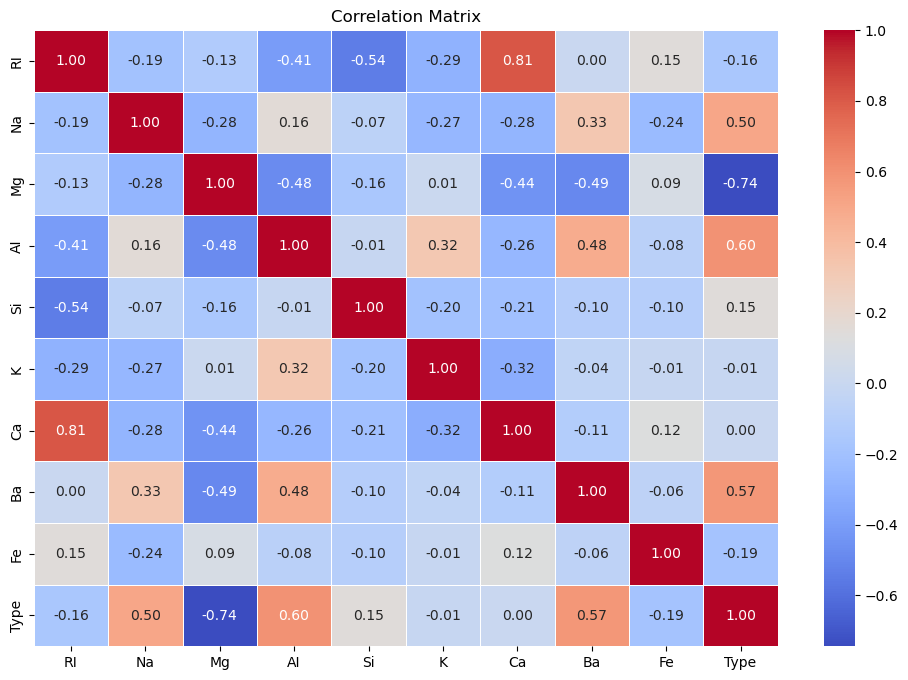

In [32]:
#1.2 Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


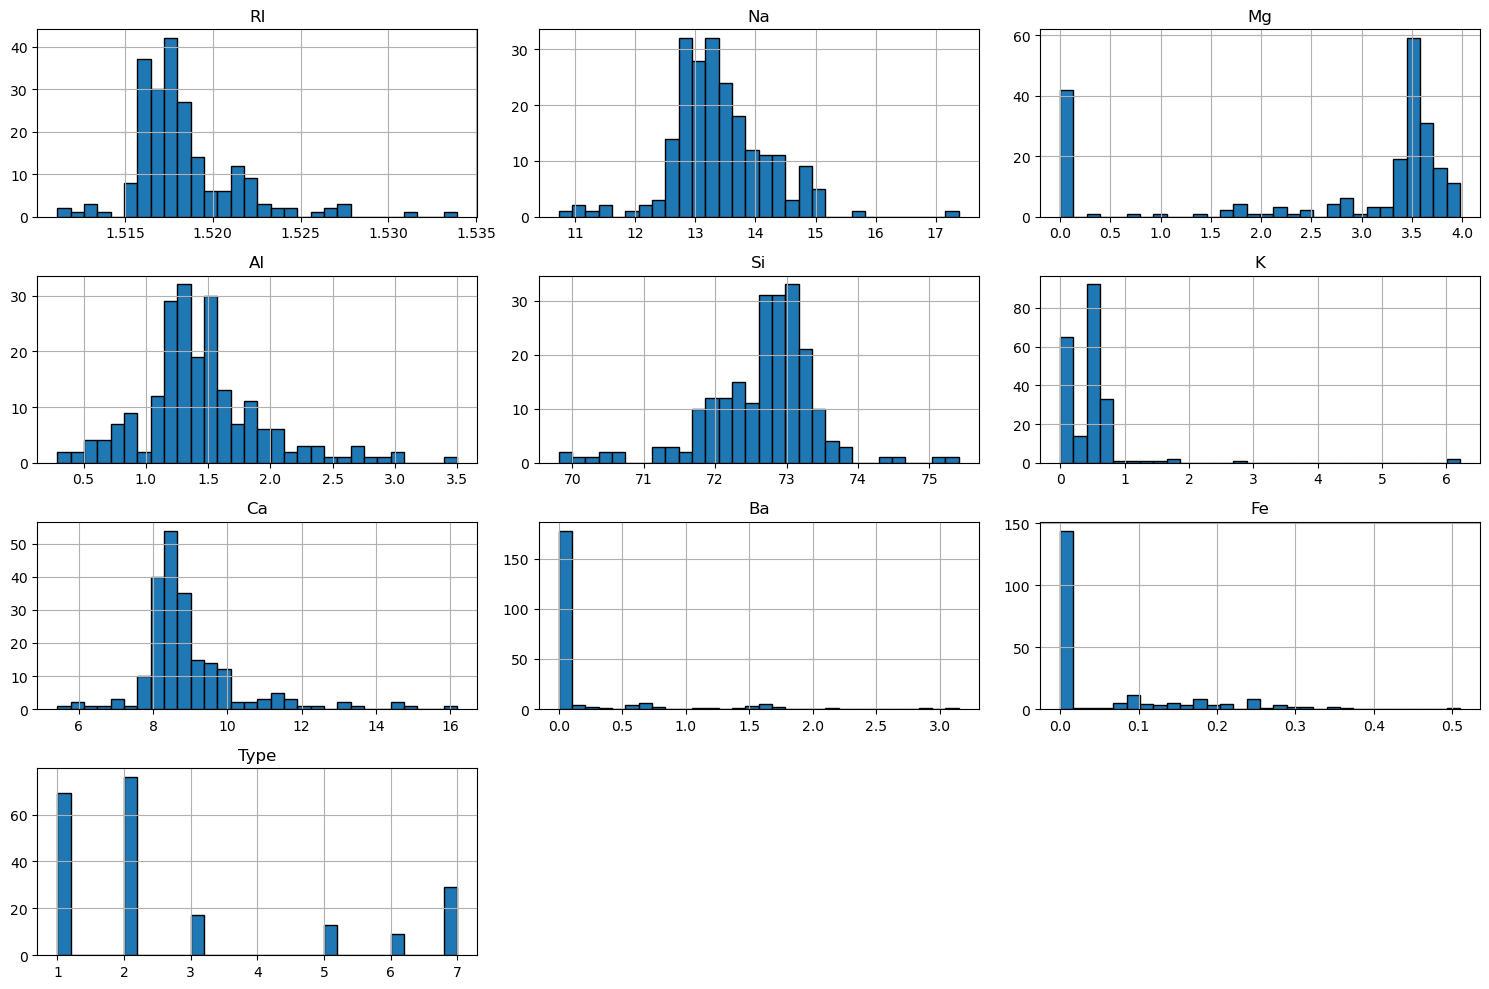

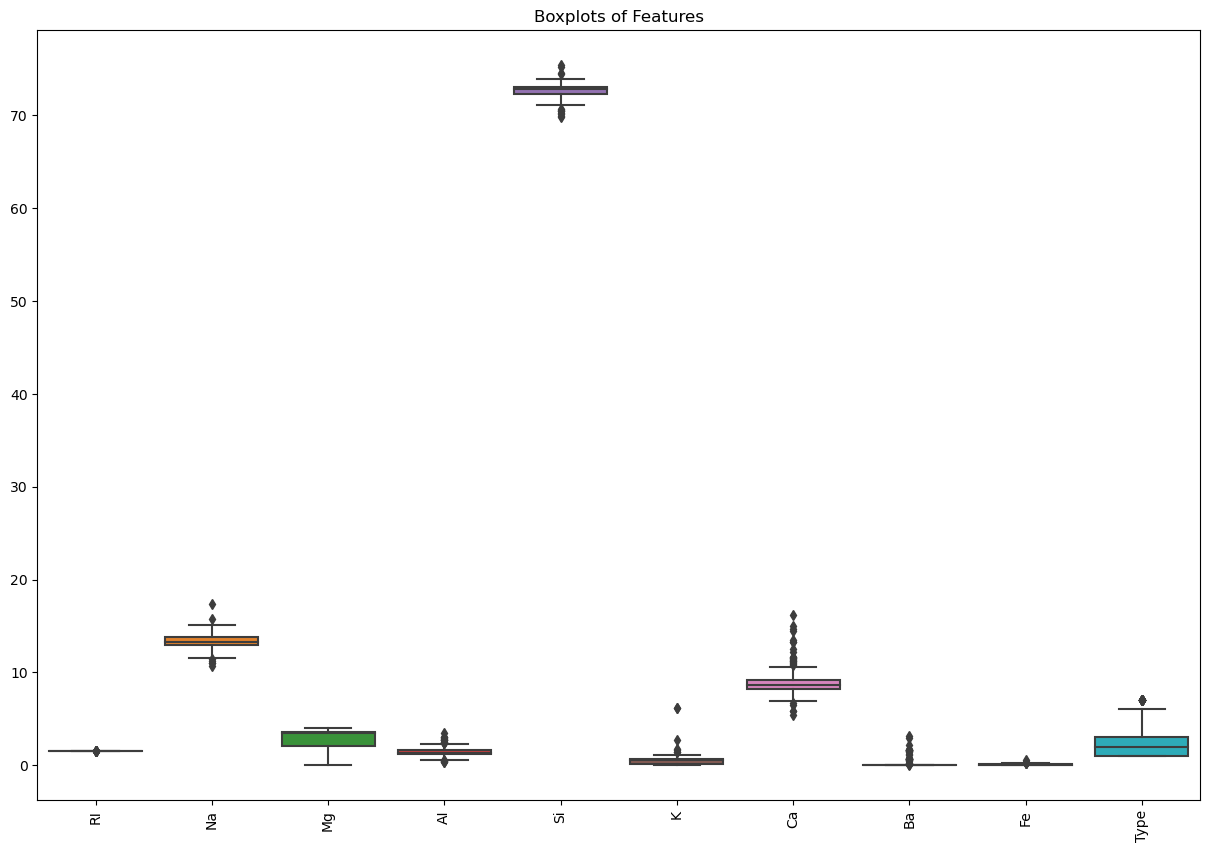

In [33]:
#1.3 Histograms and Boxplots
# Histograms
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplots of Features')
plt.show()


In [34]:
#2. Data Preprocessing
#2.1 Feature and Target Separation
# Separate features (X) and target variable (y)
X = df.drop('Type', axis=1)
y = df['Type']


In [35]:
#2.2 Standardization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


In [36]:
#3. Model Building
#3.1 Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [37]:
#3.2 Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 8  2  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.63      0.80      0.71        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.74        43
   macro avg       0.81      0.67      0.72        43
weighted avg       0.77      0.74      0.75        43



In [38]:
#4. Model Evaluation
4.1 Feature Importance
# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Feature Importances:
  Feature  Importance
2      Mg    0.161980
3      AI    0.155511
0      RI    0.137703
6      Ca    0.137636
1      Na    0.119630
4      Si    0.093816
5       K    0.077386
7      Ba    0.072920
8      Fe    0.043417


In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base model
base_model = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging model
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging model
from sklearn.metrics import classification_report, confusion_matrix

print("Bagging Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))


Bagging Model:
Confusion Matrix:
[[ 8  1  0  0  0  1]
 [ 3 11  0  1  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.79      0.73      0.76        15
           3       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.81        43
   macro avg       0.86      0.85      0.84        43
weighted avg       0.82      0.81      0.81        43



In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the base model
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize the AdaBoost model with SAMME
adaboost_model = AdaBoostClassifier(base_model, algorithm='SAMME', n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Print confusion matrix and classification report
print("AdaBoost Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost, zero_division=0))



AdaBoost Model:
Confusion Matrix:
[[ 2  8  0  0  0  0]
 [ 1 14  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  1  2  0]
 [ 0  1  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.20      0.31        10
           2       0.48      0.93      0.64        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.60        43
   macro avg       0.52      0.45      0.45        43
weighted avg       0.60      0.60      0.55        43



In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base model and AdaBoost model with SAMME
base_model = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(base_model, algorithm='SAMME', n_estimators=50)

# Fit the model
adaboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_adaboost = adaboost_model.predict(X_test)


In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the Gradient Boosting model
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

print("Gradient Boosting Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gradient_boosting))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gradient_boosting))


Gradient Boosting Model:
Confusion Matrix:
[[ 6  2  1  0  0  1]
 [ 3 11  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.60      0.60        10
           2       0.65      0.73      0.69        15
           3       0.67      0.67      0.67         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.70        43
   macro avg       0.72      0.65      0.67        43
weighted avg       0.70      0.70      0.70        43



In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Specify zero_division parameter to handle undefined metrics
print("Bagging Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging, zero_division=0))

print("AdaBoost Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_adaboost))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost, zero_division=0))

print("Gradient Boosting Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gradient_boosting))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gradient_boosting, zero_division=0))


Bagging Model:
Confusion Matrix:
[[ 8  1  0  0  0  1]
 [ 3 11  0  1  0  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.79      0.73      0.76        15
           3       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.81        43
   macro avg       0.86      0.85      0.84        43
weighted avg       0.82      0.81      0.81        43

AdaBoost Model:
Confusion Matrix:
[[ 9  0  0  0  0  1]
 [13  2  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  1  0  5]]

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.90